***This is an introduction of common exploratory data analysis (EDA) tasks that users typically would do against dataset***

***We will use the wine quality example dataset that is available to source from multiple places (eg. kaggle, etc)***

***Evaluate the data:***
#threshold checks for relevant columns (values >X, sum of col Z, diff of A vs B cols)
#the sum of all rows for a certain column 

***Get a general understanding of the data:***
#Joins (inner and outer)
#geting rid of "nulls"
#scrapping cols or rows you don't need in the df
#converting text to #s and vice versa
#reformatting data (eg. $$, decimals, etc)

***Summary of tasks covered in this notebook example***
#1. wine_quality = pd.read_csv('winequality-red.csv') - read the dataset (upload the datset to your local directory first)
#2. wine_quality.head()  -top 5 lines of dataset
#3. wine_quality.shape  -# of rows and cols 
#4. print(wine_quality.columns)  -cols by list
#5. print(wine_quality.count()) -list of cols and the total # of null values for each
#6. print(wine_quality.info())  -type of each col along with its row counts of non-null 
#7. wine_quality.describe()  -basic stats of each col 
#8. wine_quality['pH'].mean()  -mean value for a specific colume
#9. wine_quality[wine_quality['quality'] == 4].mean()  -avg value of all the other cols based on a certain value of 1 col
#10. wine_quality['pH'].value_counts()  -how many times does a certain value show up for a col
#11. wine_quality['pH'].value_counts(normalize=True)  -value counts in percentage
#12. wine_quality.sort_values(by='quality', ascending=False).head()  -sorting by a specific col
#13. wine_quality[-1:]  -showing the last row of the df
#14. wine_quality.apply(np.max)  -applying functions to a df
#15. columns_to_show = ['residual sugar', 'alcohol', 'quality'];  wine_quality.groupby(['density'])[columns_to_show].describe(percentiles=[]) 

In [23]:
import pandas as pd
import numpy as np

# Import Visualization lib.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
#read the dataset

wine_quality = pd.read_csv('winequality-red.csv')

In [4]:
#show the dataset

wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# --show the total # of rows, cols 

wine_quality.shape

(1599, 12)

In [9]:
#change data set from wide to long 
pd.melt(wine_quality)

,variable,value
0,fixed acidity,7.4
1,fixed acidity,7.8
2,fixed acidity,7.8
3,fixed acidity,11.2
4,fixed acidity,7.4
...,...,...
19183,quality,5.0
19184,quality,6.0
19185,quality,6.0
19186,quality,5.0


In [6]:
#see the columns by themselves

print(wine_quality.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
# --show the list of column names and the total # of non null values for each
#OR a = wine_quality.count()  ->  print(a) 

print(wine_quality.count())

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64


In [9]:
#see the type of each column along with its row counts of non-null all at the same time

print(wine_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [10]:
#see some basic stats of each column 

#for non numerical stats, you would use:  wine_quality.describe(include=['object', 'bool'])

wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#indexing and retrieving data
#getting a mean value for a specific column

wine_quality['pH'].mean()

3.311113195747343

In [21]:
#what is the avg value of all the other columns based on a certain value of 1 column
wine_quality[wine_quality['quality'] == 3].mean()

fixed acidity            8.360000
volatile acidity         0.884500
citric acid              0.171000
residual sugar           2.635000
chlorides                0.122500
free sulfur dioxide     11.000000
total sulfur dioxide    24.900000
density                  0.997464
pH                       3.398000
sulphates                0.570000
alcohol                  9.955000
quality                  3.000000
dtype: float64

In [84]:
#get value counts;  how many times does a certain value show up for a column

wine_quality['pH'].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
2.95     1
3.74     1
2.87     1
2.90     1
3.70     1
Name: pH, Length: 89, dtype: int64

In [85]:
#get value counts in percentage;  how many times does a certain value show up for a column

wine_quality['pH'].value_counts(normalize=True)

3.30    0.035647
3.36    0.035022
3.26    0.033146
3.38    0.030019
3.39    0.030019
          ...   
2.95    0.000625
3.74    0.000625
2.87    0.000625
2.90    0.000625
3.70    0.000625
Name: pH, Length: 89, dtype: float64

In [89]:
#sorting by a specific column

wine_quality.sort_values(by='quality', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [103]:
#1st or last item in the dataframe
wine_quality[-1:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [104]:
#1st or last item in the dataframe
wine_quality[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
#applying functions to cells using apply()

wine_quality.apply(np.max) 

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [111]:
#groupby functions ; df.groupby(by=grouping_columns)[columns_to_show].function()
#First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
#Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
#Finally, one or several functions are applied to the obtained groups per selected columns.

columns_to_show = ['residual sugar', 'alcohol', 'quality']
wine_quality.groupby(['density'])[columns_to_show].describe(percentiles=[])

residual sugar                                   alcohol        \
                 count  mean       std   min   50%   max   count  mean   
density                                                                  
0.99007            2.0   0.9  0.000000   0.9   0.9   0.9     2.0  12.7   
0.99020            1.0   4.3       NaN   4.3   4.3   4.3     1.0  13.6   
0.99064            2.0   2.4  0.000000   2.4   2.4   2.4     2.0  11.7   
0.99080            1.0   1.8       NaN   1.8   1.8   1.8     1.0  14.0   
0.99084            1.0   1.6       NaN   1.6   1.6   1.6     1.0  14.0   
...                ...   ...       ...   ...   ...   ...     ...   ...   
1.00260            2.0  10.3  7.353911   5.1  10.3  15.5     2.0   9.8   
1.00289            1.0   6.6       NaN   6.6   6.6   6.6     1.0   9.3   
1.00315            3.0   4.2  0.000000   4.2   4.2   4.2     3.0  11.1   
1.00320            1.0   3.7       NaN   3.7   3.7   3.7     1.0  11.2   
1.00369            2.0  15.4  0.000000  15.4  15.4  15.4     2.0   9.0   

                                    quality                                
              std   min   50%   max   count mean       std  min  50%  max  
density                                                                    
0.99007  0.000000  12.7  12.7  12.7     2.0  6.0  0.000000  6.0  6.0  6.0  
0.99020       NaN  13.6  13.6  13.6     1.0  6.0       NaN  6.0  6.0  6.0  
0.99064  0.000000  11.7  11.7  11.7     2.0  7.0  0.000000  7.0  7.0  7.0  
0.99080       NaN  14.0  14.0  14.0     1.0  8.0       NaN  8.0  8.0  8.0  
0.99084       NaN  14.0  14.0  14.0     1.0  6.0       NaN  6.0  6.0  6.0  
...           ...   ...   ...   ...     ...  ...       ...  ...  ...  ...  
1.00260  0.848528   9.2   9.8  10.4     2.0  5.5  0.707107  5.0  5.5  6.0  
1.00289       NaN   9.3   9.3   9.3     1.0  5.0       NaN  5.0  5.0  5.0  
1.00315  0.000000  11.1  11.1  11.1     3.0  5.0  0.000000  5.0  5.0  5.0  
1.00320       NaN  11.2  11.2  11.2     1.0  7.0       NaN  7.0  7.0  7.0  
1.00369  0.000000   9.0   9.0   9.0     2.0  6.0  0.000000  6.0  6.0  6.0  

[436 rows x 18 columns]

In [22]:
wine_quality.melt(df)

NameError: name 'df' is not defined

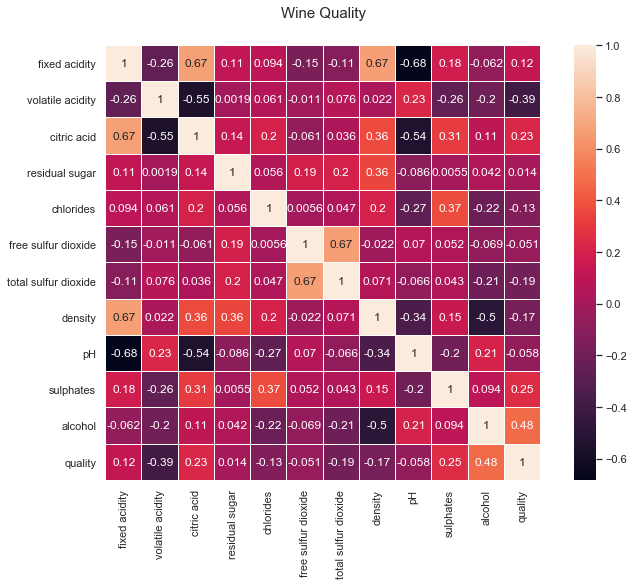

In [24]:
plt.figure(figsize=(12, 8))
plt.title('Wine Quality', y=1.05, size=15)
sns.heatmap(wine_quality.corr(), linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white', annot=True)

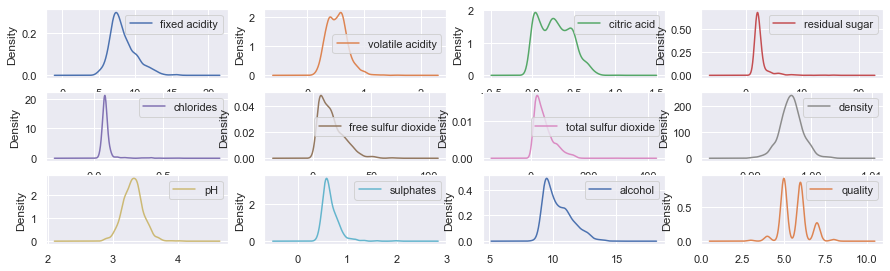

In [28]:
%matplotlib inline
ax = wine_quality.plot(kind='density', figsize=(15,15), subplots=True, layout=(10,4), sharex=False)
ax = plt.xticks([]), plt.yticks([])
